Встроенный в pandas метод plot

Pandas позволяет строить различные виды графиков и чартов. При быстрой разработке подходит встроенный метод pandas.plot:

<Axes: xlabel='t'>

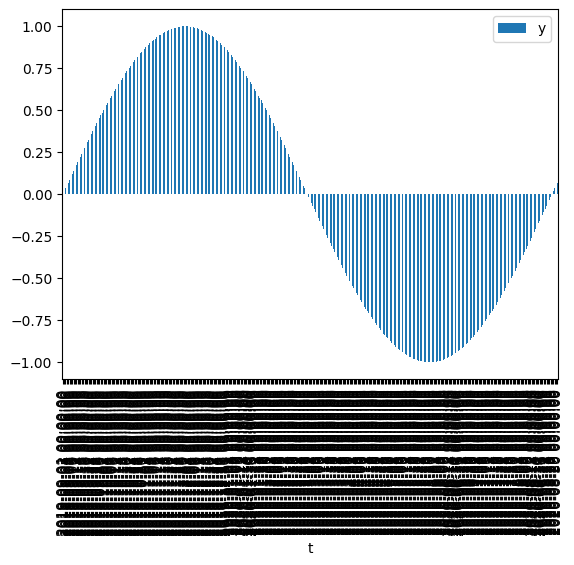

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame()
## создаём 365 дат с частотой в 1 день, начиная с 1 сентября 2019
df['t'] = pd.date_range(start= '2019-09-01 ', periods=365, freq= 'D')
## строим синус, используя индекс таймфрейма
df['y'] = np.sin(df.index * np.pi / 180)
## визуализируем при помощи pandas
df.plot(x='t', y='y', kind='bar')

Однако, этот метод не подходит, если нужно больше контроля над графиком. В частности, pandas не всегда может красиво отобразить даты на оси абсцисс.

## matplotlib

При помощи matplotlib можно кастомизировать графики, добавляя все необходимые элементы (подписывать оси, менять размеры шрифтов, добавлять текст и стрелки, строить график в графике и прочее).

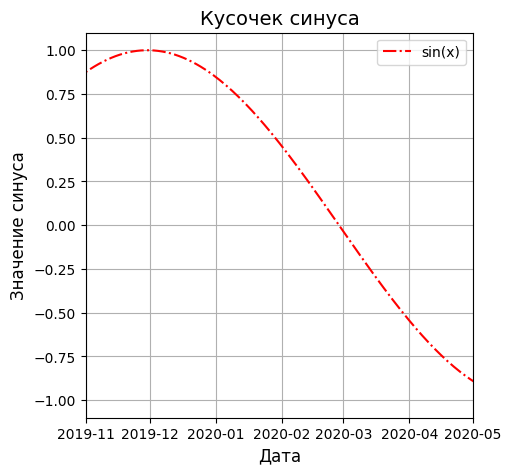

In [8]:
f = plt.figure(figsize=(5, 5))
plt.plot(df.t, df.y, ls='-.', color='r')
plt.xlim([pd.to_datetime('2019-11-01', format="%Y-%m-%d"), pd.to_datetime('2020-05-01', format="%Y-%m-%d")])
plt.legend(['sin(x)'])
plt.title('Кусочек синуса', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение синуса', fontsize=12)
plt.grid()

## Лайфхак

Вместо прямого обращения к методу plt можно создать оси (ax) и обращаться к ним. Этот метод более предпочтителен, он дает больше контроля над графиком. Также он позволяет нарисовать несколько графиков рядом друг с другом.

### Обращение к осям

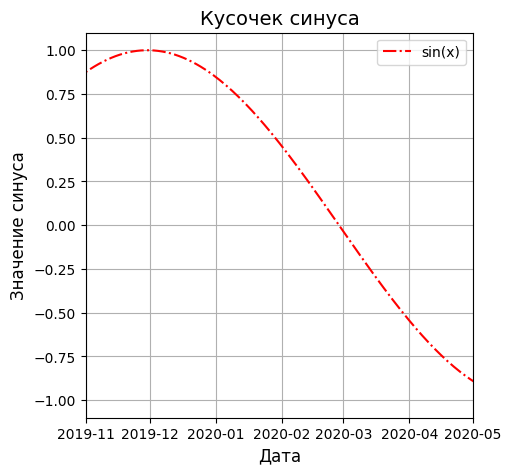

In [10]:
f, ax = plt.subplots(figsize=(5, 5))
ax.plot(df.t, df.y, ls='-.', color='r')
plt.xlim([pd.to_datetime('2019-11-01', format="%Y-%m-%d"), pd.to_datetime('2020-05-01', format="%Y-%m-%d")])
ax.legend(['sin(x)'])
ax.set_title('Кусочек синуса', fontsize=14)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Значение синуса', fontsize=12)
ax.grid()

### Обращение к plt

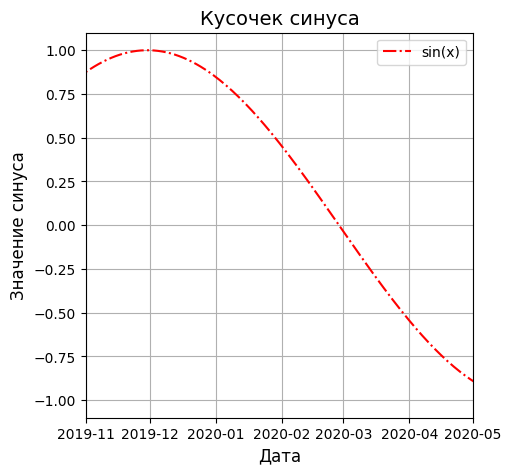

In [13]:
f = plt.figure(figsize=(5, 5))
plt.plot(df.t, df.y, ls='-.', color='r')
plt.xlim([pd.to_datetime('2019-11-01', format="%Y-%m-%d"), pd.to_datetime('2020-05-01', format="%Y-%m-%d")])
plt.legend(['sin(x)'])
plt.title('Кусочек синуса', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение синуса', fontsize=12)
plt.grid()

Обратите внимание на разное название методов (приставка set_) при обращении через оси и через plt.

## Пример двух графиков

В функции plt.subplots() указано расположение графиков (1 строка, 2 столбца). Оси координат ax являются листом, к элементам которого обращаемся для построения первого и второго графиков.

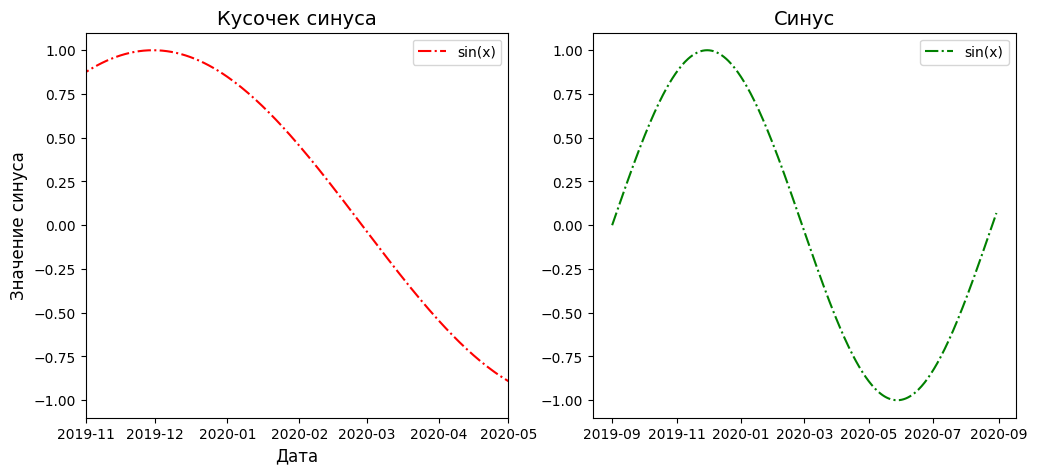

In [34]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df.t, df.y, ls='-.', color='r')
#ax[0].set_xlim(['2019-11-01', '2020-05'])
ax[0].set_xlim([pd.to_datetime('2019-11-01', format="%Y-%m-%d"), pd.to_datetime('2020-05-01', format="%Y-%m-%d")])
ax[0].legend(['sin(x)'])
ax[0].set_title('Кусочек синуса', fontsize=14)
ax[0].set_xlabel('Дата', fontsize=12)
ax[0].set_ylabel('Значение синуса', fontsize=12)
ax[0].grid()

ax[1].plot(df.t, df.y, ls='-.', color='g')
ax[1].legend(['sin(x)'])
ax[1].set_title('Cинус', fontsize=14)
ax[0].grid()

Со стандартными настройками текст на графиках получается слишком мелким.

Чтобы на каждом графике не писать вручную fontsize=..., применяются глобальные настройки графиков. Делается это при помощи обращения  plt.rcParams:

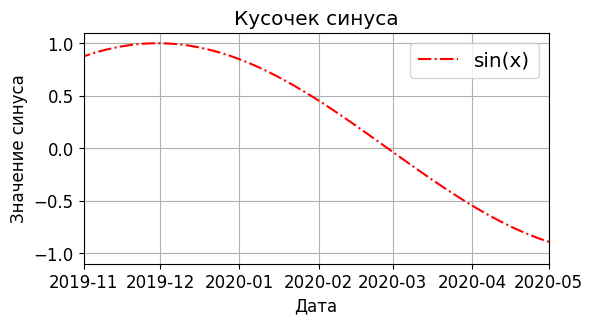

In [50]:
## глобальные настройки графиков
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

f, ax = plt.subplots()
#ax.plot(df.t, df.y, ls='-.', color='r')
ax.plot(df.t, df.y, ls='-.', color='r')
ax.set_xlim([pd.to_datetime('2019-11-01', format="%Y-%m-%d"), pd.to_datetime('2020-05-01', format="%Y-%m-%d")])
ax.legend(['sin(x)'])
ax.set_title('Кусочек синуса')
ax.set_xlabel('Дата')
ax.set_ylabel('Значение синуса')
ax.grid()

# Визуализация при помощи seaborn

В seaborn более эстетический вид графиков, чем в matplotlib.

seaborn позволяет легко делать некоторые классы визуализаций, которые сложно сделать в matplotlib, например, сlustermap.

<Axes: xlabel='t', ylabel='y'>

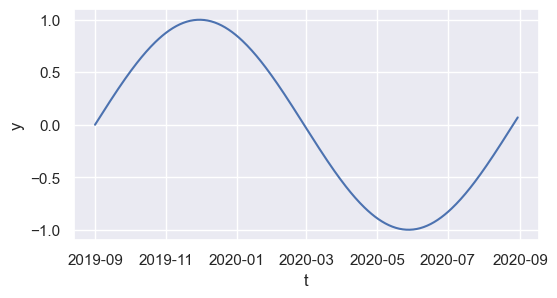

In [53]:
import seaborn as sns
sns.set() ## ставим эстетические параметры
## визуализируем при помощи seaborn
sns.lineplot(x="t", y="y", data=df)

# Визуализация при помощи plotly

Создание графиков при plotly более трудоёмко, но графики сразу получаются интерактивными.

In [57]:
import plotly.graph_objects as go

## создаём фигуру и добавляем в неё график
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.t, y=df.y, mode='lines'))
fig.show()

# Визуализация финансовых данных

Встроенный метод Plotly — Candlestick() — рисует японские свечи и автоматически добавляет ползунок под график для скроллинга.

In [70]:
import plotly.graph_objects as go
import pandas as pd

## загружаем стоимость акций apple
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
## говорим методу Candlestick какие колонки дейтафрейма использовать
data = [ go.Candlestick(x      =df['Date'],
                        open   =df['AAPL.Open'],
                        high   =df['AAPL.High'],
                        low    =df['AAPL.Low'],
                        close  =df['AAPL.Close'])]

# отображаем фигуру с данными
fig = go.Figure(data)
fig.show()

In [64]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()